# 모두의 딥러닝 개정 3판 
## 19장 세상에 없는 얼굴 GAN, 오토인코더
- **이미지의 특징을 추출하는 오토인코더(Auto-Encoder, AE)**
  * GAN이 세상에 존재하지 않는 완전한 가상의 것을 만들어냄   
    실존하지 않지만 완전한 가상 이미지 생성
  * AE는 입력 데이터의 특징을 효율적으로 담아낸 이미지를 만들어냄
    초점이 좀 흐릿하고 윤곽이 불명확하지만 데이터의 특징을 유추할 수 있는 것들이 모아 이미지 생성
  * AE 장점: 부족한 학습 데이터 수를 효과적으로 늘려줌

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# MNIST 데이터셋 불러오기
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28 ,28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28 ,28, 1).astype(float) / 255

In [3]:
# 생성자 모델 만들기
autoencoder = models.Sequential()

# 인코딩 부분 (차원 축소)
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same',
                             input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu', strides=2))
# MaxPooling2D : 특징만 갖고 크기 줄이기
# Conv2D : 학습할 파라미터를 가지고 연산함


# 디코딩 부분  (차원 확장)
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 모델 구조 확인
# input_shape의 크기 집중
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [4]:
# 컴파일 및 학습
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128,
               validation_data=(X_test, X_test))
# X_train(입력값, 원데이터), X_train(target, autoencoder 과정을 지난 출력값)

Epoch 1/50
469/469 [==============================] - 89s 188ms/step - loss: 0.2192 - val_loss: 0.1340
Epoch 2/50
469/469 [==============================] - 88s 188ms/step - loss: 0.1246 - val_loss: 0.1164
Epoch 3/50
469/469 [==============================] - 88s 188ms/step - loss: 0.1138 - val_loss: 0.1090
Epoch 4/50
469/469 [==============================] - 90s 192ms/step - loss: 0.1080 - val_loss: 0.1045
Epoch 5/50
469/469 [==============================] - 90s 191ms/step - loss: 0.1039 - val_loss: 0.1007
Epoch 6/50
469/469 [==============================] - 88s 187ms/step - loss: 0.1007 - val_loss: 0.0983
Epoch 7/50
469/469 [==============================] - 90s 191ms/step - loss: 0.0982 - val_loss: 0.0958
Epoch 8/50
469/469 [==============================] - 89s 189ms/step - loss: 0.0963 - val_loss: 0.0944
Epoch 9/50
469/469 [==============================] - 89s 191ms/step - loss: 0.0949 - val_loss: 0.0934
Epoch 10/50
469/469 [==============================] - 90s 192ms/step - l

313/313 [==============================] - 1s 3ms/step


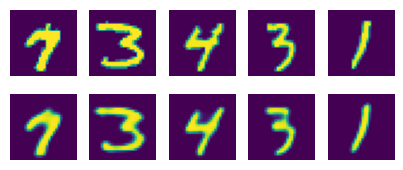

In [5]:
# 학습된 결과를 출력

random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 위 오토인코더 모델에 집어 넣습니다.
# 정답 이미지

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기 정하기

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열
   ax = plt.subplot(2, 7, i+1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지(원본 이미지)
   ax.axis('off')
   ax = plt.subplot(2, 7, 7+i+1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력
   ax.axis('off')
plt.show()